In [15]:
# pip install plotly
import numpy as np
import plotly.graph_objects as go

# ---------- paramètres ----------
R = 3.0            # rayon du cylindre
turns = 6          # nombre de tours
pitch = 0.6        # pas (écart en z par tour)
points_per_turn = 80
jitter = 0.02      # petit bruit (0 à 0.03) pour un effet "dessin à la main"
dot_size = 4       # taille des marqueurs
colors = dict(a="tomato", b="deepskyblue")  # couleurs des deux hélices

# ---------- géométrie : deux hélices déphasées de π ----------
T = np.linspace(0, 1*np.pi*turns, points_per_turn*turns)

def helix(phase):
    x = R*np.cos(T + phase)
    y = R*np.sin(T + phase)
    z = (pitch/(2*np.pi)) * (T)
    if jitter > 0:
        x += np.random.normal(0, jitter, size=x.size)
        y += np.random.normal(0, jitter, size=y.size)
        z += np.random.normal(0, jitter, size=z.size)*0.2
    return x, y, z

xa, ya, za = helix(0.0)          
xb, yb, zb = helix(np.pi)        

# ---------- figure Plotly ----------
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=xa, y=ya, z=za,
    mode="markers",
    marker=dict(size=dot_size, color=colors["a"]),
    name="Hélice A"
))

fig.add_trace(go.Scatter3d(
    x=xb, y=yb, z=zb,
    mode="markers",
    marker=dict(size=dot_size, color=colors["b"]),
    name="Hélice B"
))

# Aspect et caméra
height = pitch*turns
fig.update_layout(
    title="Double hélice en points",
    #paper_bgcolor="black",
    #plot_bgcolor="black",
    scene=dict(
        xaxis=dict(visible=False),
        yaxis=dict(visible=False),
        zaxis=dict(visible=False),
        aspectmode="data"
    ),
    margin=dict(l=0, r=0, t=40, b=0)
)

# vue de 3/4 pour rappeler l'image donnée
fig.update_layout(
    scene_camera=dict(eye=dict(x=1.75, y=1.25, z=0.8))
)

fig.show()


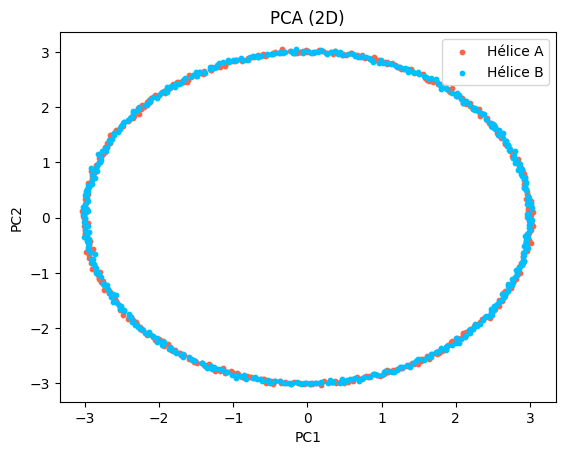

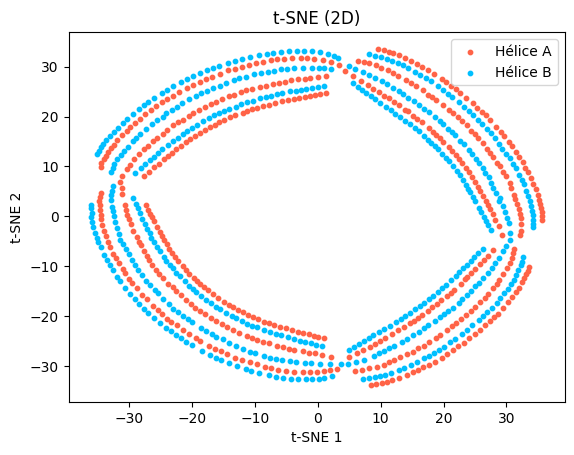

In [17]:
# pip install scikit-learn matplotlib plotly
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# ---------- paramètres ----------
R = 3.0; turns = 6; pitch = 0.6; points_per_turn = 80; jitter = 0.02
colors = dict(a="tomato", b="deepskyblue")  # mêmes couleurs que ton code

# ---------- génération des deux hélices ----------
T = np.linspace(0, 1*np.pi*turns, points_per_turn*turns)
rng = np.random.default_rng(42)

def helix(phase):
    x = R*np.cos(T + phase)
    y = R*np.sin(T + phase)
    z = (pitch/(2*np.pi)) * (T)
    if jitter > 0:
        x = x + rng.normal(0, jitter, size=x.size)
        y = y + rng.normal(0, jitter, size=y.size)
        z = z + rng.normal(0, jitter, size=z.size)*0.2
    return x, y, z

xa, ya, za = helix(0.0)
xb, yb, zb = helix(np.pi)

Xa = np.vstack([xa, ya, za]).T
Xb = np.vstack([xb, yb, zb]).T
X  = np.vstack([Xa, Xb])
y  = np.array([0]*Xa.shape[0] + [1]*Xb.shape[0])  # labels: 0=A, 1=B

# ---------- PCA (2D) ----------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure()
plt.scatter(X_pca[y==0,0], X_pca[y==0,1], s=10, c=colors["a"], label="Hélice A")
plt.scatter(X_pca[y==1,0], X_pca[y==1,1], s=10, c=colors["b"], label="Hélice B")
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.title("PCA (2D)")
plt.legend(); plt.show()

# ---------- t-SNE (2D) ----------
tsne = TSNE(n_components=2, perplexity=30, learning_rate="auto", init="pca", random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure()
plt.scatter(X_tsne[y==0,0], X_tsne[y==0,1], s=10, c=colors["a"], label="Hélice A")
plt.scatter(X_tsne[y==1,0], X_tsne[y==1,1], s=10, c=colors["b"], label="Hélice B")
plt.xlabel("t-SNE 1"); plt.ylabel("t-SNE 2"); plt.title("t-SNE (2D)")
plt.legend(); plt.show()
